# Reproduce C. Stewart, et. al , ACS Catal. 2018, 8, 8255−8262

This notebook demonstrates reproducing the XAS results of the paper with [Larch](https://xraypy.github.io/xraylarch/xafs/) using the corresponding published dataset (raw data). 

C. Stewart, E. K. Gibson, K. Morgan, G. Cibin, A. J. Dent, C. Hardacre, E. V. Kondratenko, V. A. Kondratenko, C. McManus, S. M. Rogers, C. E. Stere, S. Chansai, Y. -C. Wang, S. J. Haigh, P. P. Wells, A. Goguet (2018). **Unraveling the H2Promotional Effect on Palladium-Catalyzed CO Oxidation Using a Combination of Temporally and Spatially Resolved Investigations** DOI: [10.1021/acscatal.8b01509](http://dx.doi.org/10.1021/acscatal.8b01509).

- **Corresponding authors**:  Emma K. Gibson, Kevin Morgan
- **E-mails**: 

The data used for reproducing the results was published in the University of Glasgow Enlighten Research Data [doi:10.5525/gla.researchdata.654](https://researchdata.gla.ac.uk/654/)

For more details about Larch, see [Larch Website](https://xraypy.github.io/xraylarch/xafs/)

## Reproducing XAS analysis

The XAS results of the paper are in [Figure 2](https://pubs.acs.org/cms/10.1021/acscatal.8b01509/asset/images/medium/cs-2018-01509s_0002.gif): with the caption and the metadata indicate which data can be used for reproducing the results presented.

**Figure Caption**
> **Fig. 2** Magnitude component of the k3-weighted non-phase-corrected Fourier transform of the EXAFS data at the front, middle, and end of the catalyst bed of the (a) fresh catalyst, (b) the catalyst under CO oxidation, and (c) the catalyst under CO oxidation with H2. Features consistent with scattering from O, Pd (of Pd0), and Pd (of PdO) are highlighted in blue, green, and yellow boxes, respectively.

**Metadata** (Readme_1141.docx - Word file)
> The XAFS spectra underpinning the results shown in the manuscript are contained in three Athena files. Included in the 100C_helium file are spectra of a Pd foil reference and PdO reference material.
>- 100C_Helium
>- 280C_with_H2
>- 280C_without_H2


In [1]:
# Library with the functions that replicate athena:
# normalisation, merging, re-binning, 
# and visualisation (plotting)
import lib.manage_athena as athenamgr  

# File handling
from pathlib import Path

#plotting library
import matplotlib.pyplot as plt
# inline: shows plot in notebook
# tk: shows plot in popup
%matplotlib inline 

# custom plot functions for paper
import paper04_plots as c_plot

He_100c_data = "C:/harwell/PSDI_test/wf_data/pub_366/DS0229/100C_Helium.prj" # fresh catalyst (2a)
CO_280c_data = "C:/harwell/PSDI_test/wf_data/pub_366/DS0229/280C_without_H2.prj" # CO oxidation without H2 (2b)
H2_280c_data = "C:/harwell/PSDI_test/wf_data/pub_366/DS0229/280C_with_H2.prj" # CO oxidation with H2 (2c)

ft_vs  =  {'kmin':2.9, 
           'kmax':10.2, 
           'window':'hanning', 
           'kweight':3, 
           'rmin':1,
           'rmax':3, 
           'dk':1}


### Reproduce figure 3a 
The following cell reproduce the plot. 
1. First, data is recovered and preprocessed (larch reads but groups but only pays attention to energy and mu).
2. Second, magnitde of R is plotted 

 do not know what to do with key 'LCF' at ''


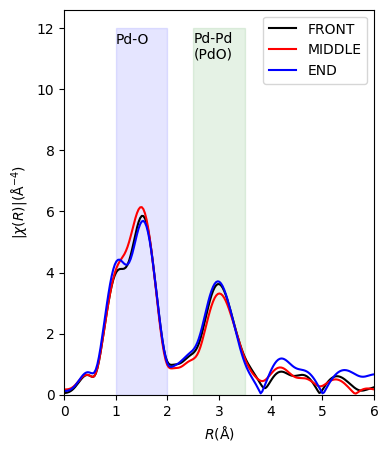

In [2]:
# read the input files 
data_prj = athenamgr.read_project(He_100c_data)

He_100c_mappings={"FRONT":  "Pd_bkg_100c_He_pos1_FRONT_merge",
                  "END":    "Pd_bkg_100c_He_pos11_END_merge",
                  "MIDDLE": "Pd_bkg_100c_He_pos5_MIDDLE_merge",}

# define dict to set colours and line stiles (common for the three plots)
plot_groups = {"FRONT":["black", "solid"], "MIDDLE":["r", "solid"], 
               "END":['b', "solid"]}

# define the highlights and labels for plotting   
highlights = [[[1, 1, 2, 2],[0, 12, 12, 0], 'b',0.1],[[2.5,2.5, 3.5, 3.5],[0, 12, 12, 0], 'g', 0.1]]        
labels=[[1, 11.5, "Pd-O"],[2.5, 11.0, "Pd-Pd\n(PdO)"]]

He_100ca_groups = {}

for a_mapping in He_100c_mappings:
    He_100ca_groups[a_mapping] = athenamgr.get_group(data_prj, He_100c_mappings[a_mapping])
    c_plot.forward_ft(He_100ca_groups[a_mapping], ft_vs)
    He_100ca_groups[a_mapping].filename = a_mapping
    
plt = c_plot.plot_chi_magnitude(He_100ca_groups, plot_groups, (4,5),[0,6],[0,12.6], highlights, labels)
plt.show()

### Reproduce figure 3b 

 do not know what to do with key 'LCF' at ''


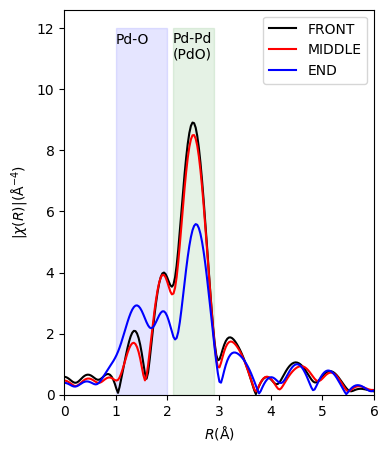

In [3]:
# read the input files 
data_prj = athenamgr.read_project(CO_280c_data)

He_280c_mappings={"FRONT":  "d_280_noH2_30_7_15_3_1_O2_CO_pos1_merge",
                  "END":    "d_280_noH2_30_7_15_3_1_O2_CO_pos11_merge",
                  "MIDDLE": "d_280_noH2_30_7_15_3_1_O2_CO_pos5_merge"}   

# need to move second shadding and second label beause the peaks have moved
highlights = [[[1, 1, 2, 2],[0, 12, 12, 0], 'b',0.1],[[2.1,2.1, 2.9, 2.9],[0, 12, 12, 0], 'g', 0.1]]        
labels=[[1, 11.5, "Pd-O"],[2.1, 11.0, "Pd-Pd\n(PdO)"]]

He_280c_groups = {}
for a_mapping in He_280c_mappings:
    He_280c_groups[a_mapping] = athenamgr.get_group(data_prj, He_280c_mappings[a_mapping])
    # perform a forward XAFS Fourier transform, from chi(k) to chi(R), using common XAFS conventions.
    c_plot.forward_ft(He_280c_groups[a_mapping], ft_vs)
    He_280c_groups[a_mapping].filename = a_mapping
    
plt = c_plot.plot_chi_magnitude(He_280c_groups, plot_groups, (4,5),[0,6],[0,12.6], highlights, labels)
plt.show()

### Reproduce figure 3c 

 do not know what to do with key 'LCF' at ''


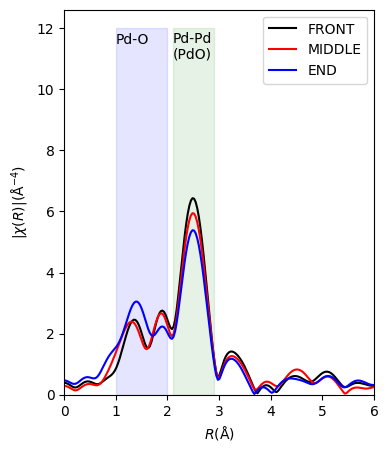

In [4]:
# read the input files 
data_prj = athenamgr.read_project(H2_280c_data)

H2_280c_mappings ={"FRONT":  "d_280_withH2_pos1_3_1_30_7_15merge",
                   "END":    "d_280_withH2_pos11_3_1_30_7_15merge",
                   "MIDDLE": "d_280_withH2_pos5_3_1_30_7_15merge"}              
                 
H2_280c_groups = {}
for a_mapping in H2_280c_mappings:
    H2_280c_groups[a_mapping] = athenamgr.get_group(data_prj, H2_280c_mappings[a_mapping])
    # perform a forward XAFS Fourier transform, from chi(k) to chi(R), using given params.
    c_plot.forward_ft(H2_280c_groups[a_mapping], ft_vs)
    H2_280c_groups[a_mapping].filename = a_mapping

plt = c_plot.plot_chi_magnitude(H2_280c_groups, plot_groups, (4,5),[0,6],[0,12.6], highlights, labels)
plt.show()    

## Reproducibility results

Most of the results can be reproduced. 

**Issues:** 
- Reproducing 2a requires aligning using the references in artemis file, need to do it in larch (artemis does it automatically).
- Tunning the K-range was needed to eliminate extra peak in 2a
- The function for **FT $\chi(k)$ (&#8491;$^{−4}$)** used here can serve for paper 03

Need to contact authors to ask for comment
